<a href="https://colab.research.google.com/github/pravalli-satya/Heart_Attack_Prediction/blob/main/Heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving archive (1).zip to archive (1).zip


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
from operator import add

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n52,1,0,125,212,0,1,168,0,1,2,2,3,0\r\n53,1,0,140,203,1,0,155,1,3.1,0,0,3,0\r\n70,1,0,145,174,0,1,125,1,2.6,0,0,3,0\r\n61,1,0,148,203,0,1,161,0,0,2,1,3,0\r\n62,0,0,138,294,1,1,106,0,1.9,1,3,2,0\r\n58,0,0,100,248,0,0,122,0,1,1,0,2,1\r\n58,1,0,114,318,0,2,140,0,4.4,0,3,1,0\r\n55,1,0,160,289,0,0,145,1,0.8,1,1,3,0\r\n46,1,0,120,249,0,0,144,0,0.8,2,0,3,0\r\n54,1,0,122,286,0,0,116,1,3.2,1,2,2,0\r\n71,0,0,112,149,0,1,125,0,1.6,1,0,2,1\r\n43,0,0,132,341,1,0,136,1,3,1,0,3,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,1,0,140,298,0,1,122,1,4.2,1,3,3,0\r\n52,1,0,128,204,1,1,156,1,1,1,0,0,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,0,2,140,308,0,0,142,0,1.5,2,1,2,1\r\n54,1,0,124,266,0,0,109,1,2.2,1,1,3,0\r\n50,0,1,120,244,0,1,162,0,1.1,2,0,2,1\r\n58,1,2,140,211,1,0,165,0,0,2,0,2,1\r\n60,1,2,140,185,0,0,155,0,3,1,0,2,0\r\n67,0,0,106,223,0,1,142,0,0.3,2,2,2,1\r\n45,1,0,104,208,0,0,148,1,3,1,0,2,1\

In [ ]:
heart1 = pd.read_csv("heart.csv")

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") #fill the median at empty spaces 
imputer.fit(heart1)
X = imputer.transform(heart1)
heart=pd.DataFrame(X, columns=heart1.columns)

In [ ]:
heart.head(303) #view the head

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,35.0,1.0,1.0,122.0,192.0,0.0,1.0,174.0,0.0,0.0,2.0,0.0,2.0,1.0
299,52.0,1.0,1.0,120.0,325.0,0.0,1.0,172.0,0.0,0.2,2.0,0.0,2.0,1.0
300,46.0,0.0,1.0,105.0,204.0,0.0,1.0,172.0,0.0,0.0,2.0,0.0,2.0,1.0
301,51.0,1.0,2.0,94.0,227.0,0.0,1.0,154.0,1.0,0.0,2.0,1.0,3.0,1.0


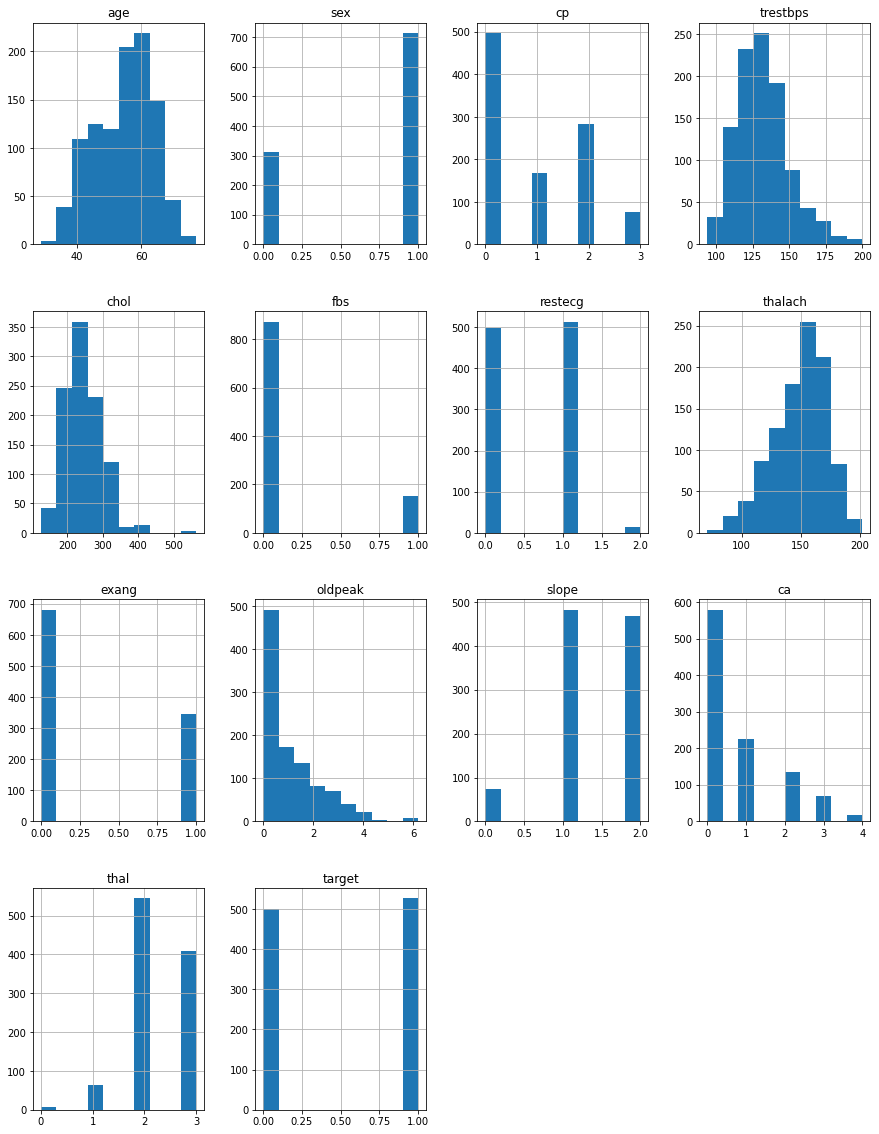

In [ ]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart1.hist(ax = ax)
plt.show()

In [ ]:
X = heart.iloc[:,:-1]
y = heart.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
featureScores

,Specs,Score
0,age,81.425368
1,sex,24.373650
2,cp,217.823922
3,trestbps,45.974069
4,chol,110.723364
5,fbs,1.477550
6,restecg,9.739343
7,thalach,650.008493
8,exang,130.470927
9,oldpeak,253.653461


In [ ]:
print(featureScores.nlargest(6,'Score'))

      Specs       Score
7   thalach  650.008493
9   oldpeak  253.653461
2        cp  217.823922
11       ca  210.625919
8     exang  130.470927
4      chol  110.723364


In [ ]:
dataset = pd.get_dummies(heart, columns = ['cp',  'ca']) #categorical data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['chol',  'thalach', 'oldpeak', 'exang']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset = dataset.drop(['age','sex','fbs','restecg','thal','slope','trestbps'],axis=1)

In [ ]:
dataset.head()

,chol,thalach,exang,oldpeak,target,cp_0.0,cp_1.0,cp_2.0,cp_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_4.0
0,-0.659332,0.821321,-0.712287,-0.060888,0.0,1,0,0,0,0,0,1,0,0
1,-0.833861,0.255968,1.403928,1.727137,0.0,1,0,0,0,1,0,0,0,0
2,-1.396233,-1.048692,1.403928,1.301417,0.0,1,0,0,0,1,0,0,0,0
3,-0.833861,0.516900,-0.712287,-0.912329,0.0,1,0,0,0,0,1,0,0,0
4,0.930822,-1.874977,-0.712287,0.705408,0.0,1,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(dataset, test_size=0.3, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 717
Rows in test set: 308



In [ ]:
X_train = train_set.iloc[:,0:13]  #independent columns for training 
y_train = train_set.iloc[:,-1]    #o/p for train set
X_test = test_set.iloc[:,0:13]    #independent columns for testing 
y_test = test_set.iloc[:,-1]       #o/p for test set

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

1


Text(0, 0.5, 'Error Rate')

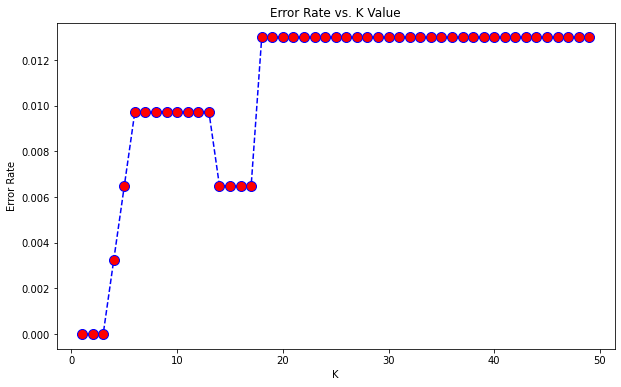

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
  

min = (np.argmin(error_rate) +1)
print(min)
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
knn = KNeighborsClassifier(n_neighbors=(min))
#train the model
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH MIN K = ', min)
print('\n')
#prediction 
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
knn_accuracy = accuracy_score(y_test,pred)

WITH MIN K =  1


[[304   0]
 [  0   4]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00         4

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [ ]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 10] #Hyperparameter1
gammas = [0.001, 0.01, 0.1, 10] #Hyperparameter2
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 1, 'gamma': 10}

In [ ]:
#prediction
svm_predict = svm_clf.predict(X_test)
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM with RBF kernel we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM with RBF kernel we get an accuracy of 100.0%


In [ ]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print("confusion matrix:\n", cm)
print(classification_report(y_test,svm_predict))

confusion matrix:
 [[304   0]
 [  0   4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00         4

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25 ,criterion='entropy', random_state=42)
#train the model
classifier.fit(X_train,y_train)
#prediction
y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
rfc_accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print("confusion matrix:\n", cm)

Accuracy :  1.0
confusion matrix:
 [[304   0]
 [  0   4]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [ ]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_accuracy*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[304   0]
 [  3   1]]


Accuracy of Logistic Regression: 99.02597402597402 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       304
           1       1.00      0.25      0.40         4

    accuracy                           0.99       308
   macro avg       1.00      0.62      0.70       308
weighted avg       0.99      0.99      0.99       308



In [ ]:
##K folds
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
##CV score for logistic regression
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
cv_score_lr = scores.mean()
print('cv_score: %.3f (%.3f)' % (mean(scores), std(scores)))

cv_score: 0.867 (0.031)


In [ ]:
##CV score for Random Forest
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
cv_score_rfc = scores.mean()
print('cv_score: %.3f (%.3f)' % (mean(scores), std(scores)))

cv_score: 0.918 (0.032)


In [ ]:
##CV score for SVM
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=cv)
cv_score_svm = scores.mean()
print('cv_score: %.3f (%.3f)' % (mean(scores), std(scores)))

cv_score: 0.870 (0.034)


In [ ]:
##CV score for KNN
knn_classifier = KNeighborsClassifier(n_neighbors = 18)
score=cross_val_score(knn_classifier,X,y,cv=cv)
cv_score_knn = score.mean()
print('cv_score: %.3f (%.3f)' % (mean(scores), std(scores)))

cv_score: 0.870 (0.034)


[0.87, 0.9183333333333333, 0.8673333333333334, 0.9233333333333335]


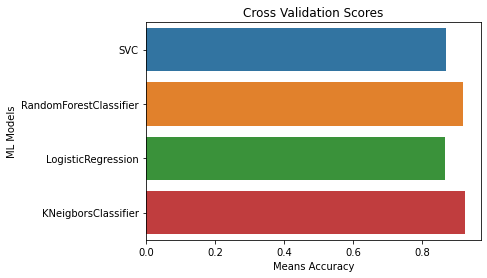

In [ ]:
##plotting cv scores of respective models
cv_result = []
cv_result.append(cv_score_svm)
cv_result.append(cv_score_rfc)
cv_result.append(cv_score_lr)
cv_result.append(cv_score_knn)
cv_results = pd.DataFrame(cv_result)
print(cv_result)
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "SVC", "RandomForestClassifier", "LogisticRegression", "KNeigborsClassifier"]})

g = sns.barplot(x="Cross Validation Means", y = "ML Models", data=cv_results)
g.set_xlabel("Means Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

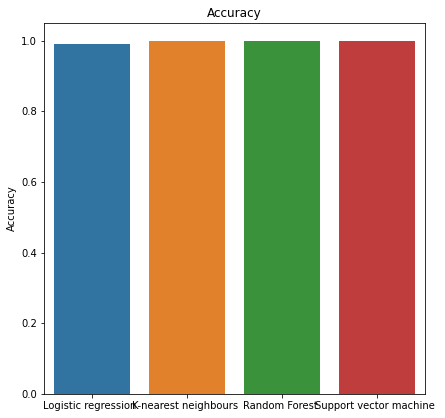

In [ ]:
comparison = pd.DataFrame({
    "Logistic regression ":{'Accuracy': lr_accuracy},
    "K-nearest neighbours ":{'Accuracy':knn_accuracy},
    "Random Forest ":{'Accuracy':rfc_accuracy},
    "Support vector machine ":{'Accuracy':svm_accuracy}
}).T
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()